## Name: Shivkumar G. Chauhan
### Roll No.: CS8A53
### Batch A-3
---
# Experiment - 7 :Use SMOTE technique to generate synthetic data. (to solve the problem of class imbalance)

## imports

In [34]:
import pandas
import numpy
import warnings
import matplotlib.pyplot as pyplot
import seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from imblearn.over_sampling import SMOTE
import random

## Configurations

In [54]:
# %matplotlib qt
%matplotlib inline
pyplot.rcParams["figure.figsize"] = (15, 12)

hiding warnings

In [3]:
warnings.filterwarnings('ignore')

Initializing Functions

In [57]:
def getClassificationEvaluation(actuals:list,predictions:list,labels:list):
    classification_data=confusion_matrix(
    actuals,
    predictions
    )
    seaborn.heatmap(classification_data,annot=True,xticklabels=labels, yticklabels=labels)
    pyplot.show()
    print(classification_report(actuals,predictions
    ))

reading dataset

In [37]:
Raw_Data=pandas.read_csv("./heart_failure_clinical_records_dataset.csv")

# Data Exploration

## Raw Data

printing Checking of Raw dataset

In [38]:
Raw_Data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


printing different statistics of dataset like mean, quantiles, min, max etc.

In [39]:
Raw_Data.describe(include="all")

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [40]:
Raw_Data['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

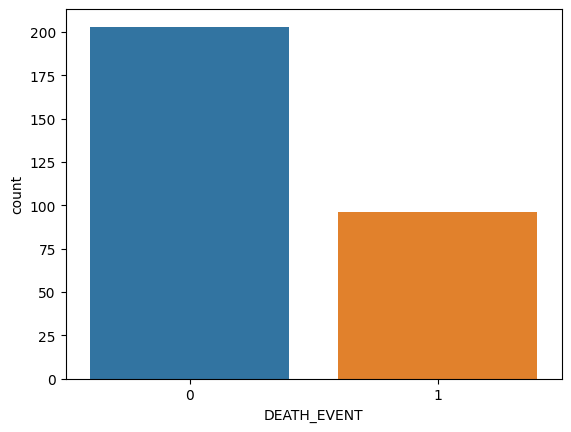

In [41]:
seaborn.countplot(x=Raw_Data['DEATH_EVENT'])

In [106]:
Raw_Data=Raw_Data.sample(frac=1)

In [107]:
Training_Features=Raw_Data.drop(['DEATH_EVENT'],axis=1)
Training_Labels=Raw_Data['DEATH_EVENT']

## Classes are unbalanced

# Applying SMOTE on Dataset

In [70]:
smote=SMOTE()

In [71]:
New_Features,New_Labels=smote.fit_resample(Training_Features,Training_Labels)

In [72]:
len(New_Labels)

406

In [73]:
New_Labels.value_counts()

0    203
1    203
Name: DEATH_EVENT, dtype: int64

<AxesSubplot: xlabel='DEATH_EVENT', ylabel='count'>

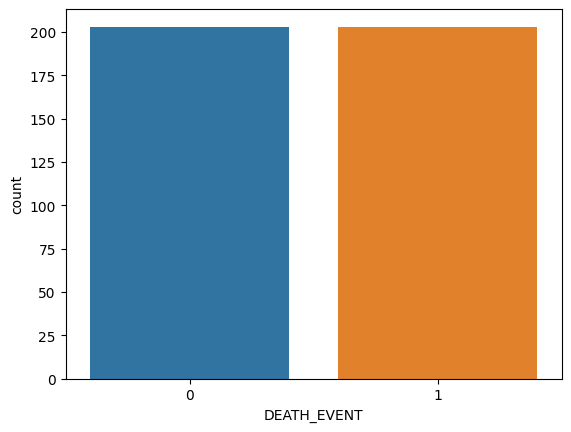

In [74]:
seaborn.countplot(x=New_Labels)

In [98]:
New_Data=New_Features
New_Data['DEATH_EVENT']=New_Labels
New_Data=New_Data.sample(frac=1)
New_Features=New_Data.drop(['DEATH_EVENT'],axis=1)
New_Labels=New_Data['DEATH_EVENT']

# Testing by Applying Model

In [32]:
logistic_regression_model_for_before_smote=LogisticRegression()
logistic_regression_model_for_after_smote=LogisticRegression()

### Before SMOTE

### After SMOTE

In [108]:
Training_Limit=int(0.8*(len(Training_Features)))

In [99]:
New_Training_Limit=int(0.8*(len(New_Features)))

In [109]:
Training_Limit

239

In [101]:
New_Training_Limit

324

In [110]:
logistic_regression_model_for_before_smote.fit(
    Training_Features[:Training_Limit],
    Training_Labels[:Training_Limit]
)

LogisticRegression()

In [103]:
logistic_regression_model_for_before_smote.fit(
    New_Features[:New_Training_Limit],
    New_Labels[:New_Training_Limit]
)

LogisticRegression()

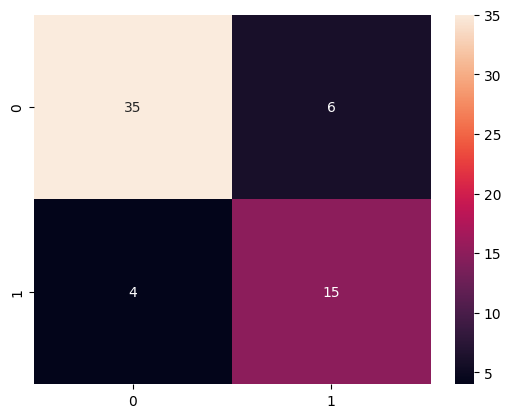

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.71      0.79      0.75        19

    accuracy                           0.83        60
   macro avg       0.81      0.82      0.81        60
weighted avg       0.84      0.83      0.84        60



In [111]:
getClassificationEvaluation(
    Training_Labels[Training_Limit:],
    logistic_regression_model_for_before_smote.predict(
        Training_Features[Training_Limit:]),
    [0,1]
)

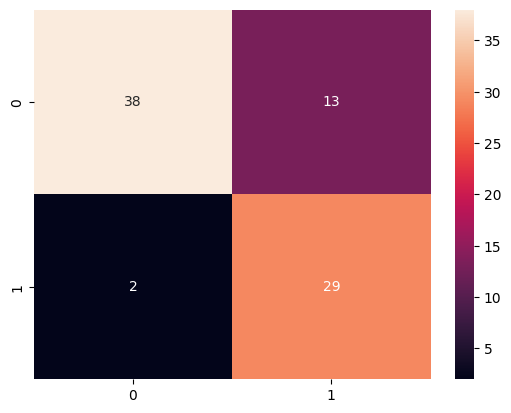

              precision    recall  f1-score   support

           0       0.95      0.75      0.84        51
           1       0.69      0.94      0.79        31

    accuracy                           0.82        82
   macro avg       0.82      0.84      0.81        82
weighted avg       0.85      0.82      0.82        82



In [105]:
getClassificationEvaluation(
    New_Labels[New_Training_Limit:],
    logistic_regression_model_for_before_smote.predict(
        New_Features[New_Training_Limit:]),
    [0,1]
)